[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]
[[1.0, 2.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
[[0. 2. 3. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1.]]


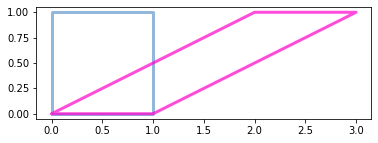

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)

# matrix with row vectors of points
P = np.array([a, b, c, d]).T
print(P)

# H = np.identity(3)
# H[0,0] = 2
# H[1,1] = 2
# H[2, 0] = 0.3
# H[2, 1] = 0.5

t = np.pi/3
#H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]] #(a) 2D Rotation
#H = [[1., 0., 2.], [0., 1., 2.], [0., 0., 1.]] #(b) 2D Translation
#H = [[2., 0., 0.], [0., 0.5, 0.], [0., 0., 1.]] #(c) 2D Scaling
#H = [[-1., 0., 0.], [0., 1., 0.],[0., 0., 1.]] #(d) 2D Reflection about Y-axis
#H = [[1., 0., 0.], [0., -1., 0.],[0., 0., 1.]] #(d) 2D Reflection about X-axis
#H = [[1., 0., 0.], [2., 1., 0.],[0., 0., 1.]] #(e) 2D Vertical Shearing
H = [[1., 2., 0.], [0., 1., 0.],[0., 0., 1.]] #(e) 2D Horizontal Shearing
print(H)

Pt = np.matmul(H, P)

P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]

Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
print(Pt)

fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

ax.plot(xt, yt, color='#ff00cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
plt.savefig('a02_7.png')

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


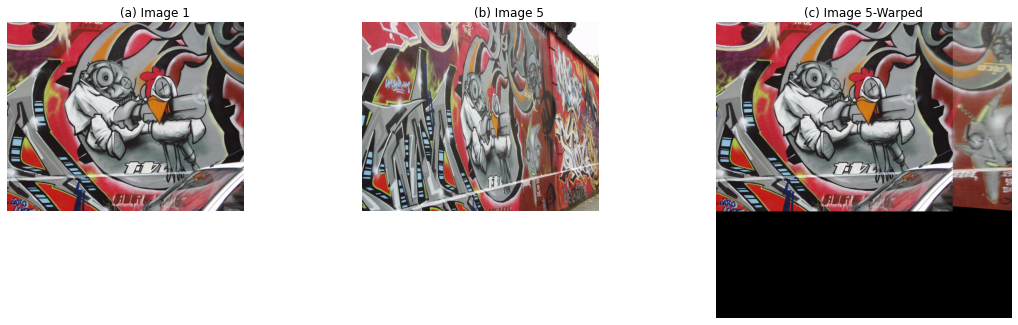

In [8]:
import cv2 as cv
import numpy as np

im1 = cv.imread('Desktop/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('Desktop/graf/img5.ppm', cv.IMREAD_ANYCOLOR)

with open('Desktop/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)

im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

im1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im5 = cv.cvtColor(im5,cv.COLOR_BGR2RGB)
im5_warped = cv.cvtColor(im5_warped,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,3,sharex='all',sharey='all',figsize=(18,18))
ax[0].imshow(im1)
ax[0].set_title('(a) Image 1')
ax[0].axis('off')
ax[1].imshow(im5)
ax[1].set_title('(b) Image 5')
ax[1].axis('off')
ax[2].imshow(im5_warped)
ax[2].set_title('(c) Image 5-Warped')
ax[2].axis('off')
plt.savefig('a02_8.png')

In [3]:
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('Desktop/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('Desktop/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)
while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)
#Homography matrix
H, mask = cv.findHomography(p1,p2)
print(H)
im4_warped = cv.warpPerspective(im4,np.linalg.inv(H),(1000,1000))
im4_warped[0:im1.shape[0],0:im1.shape[1]] = im1
im1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im4 = cv.cvtColor(im4,cv.COLOR_BGR2RGB)
im4_warped = cv.cvtColor(im4_warped,cv.COLOR_BGR2RGB)
cv.namedWindow("Image 4-Warped",cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4-Warped",im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[188. 137.]
 [332. 191.]
 [404. 209.]
 [683.  57.]
 [545. 542.]]
[[173. 235.]
 [282. 252.]
 [325. 250.]
 [359.  82.]
 [575. 484.]]
[[ 6.63169969e-01  7.01293859e-01 -3.40303489e+01]
 [-1.44188226e-01  9.70880393e-01  1.48008883e+02]
 [ 4.06493452e-04  1.66541645e-05  1.00000000e+00]]


In [4]:
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('Desktop/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('Desktop/graf/img5.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im5copy = im5.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)

A = np.empty((2*N, 9))
for i in range(N):
    A[2*i,:]=[-p1[i][0],-p1[i][1],-1, 0, 0, 0, p1[i][0]*p2[i][0], p1[i][1]*p2[i][0], p2[i][0]]
    A[2*i+1,:]=[0, 0, 0, -p1[i][0], -p1[i][1], -1,  p1[i][0]*p2[i][1], p1[i][1]*p2[i][1], p2[i][1]]
u,s,v=np.linalg.svd(A)
L=v[-1,:]/v[-1,-1]
Homography=L.reshape(3,3)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(Homography), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 5 Warped",cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[188. 136.]
 [336. 192.]
 [405. 208.]
 [682.  57.]
 [543. 539.]]
[[321. 158.]
 [383. 235.]
 [410. 258.]
 [491. 145.]
 [481. 581.]]


In [5]:
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
p3 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('Desktop/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('Desktop/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('Desktop/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
im5copy = im5.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)
while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p3, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)
while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)
print(p3)

#Homography matrix
H4, status14 = cv.findHomography(p1,p2,cv.RANSAC)
H5, status15 = cv.findHomography(p1,p3,cv.RANSAC)
im4_warped = cv.warpPerspective(im4,np.linalg.inv(H4),(1000,1000))
im5_warped = cv.warpPerspective(im5,np.linalg.inv(H5),(1000,1000))
im4_warped[0:im1.shape[0],0:im1.shape[1]] = im1
cv.namedWindow("Image 4-Warped",cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4-Warped",im4_warped)
cv.waitKey(0)
cv.namedWindow("Image 5-Warped",cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5-Warped",im5_warped)
cv.waitKey(0)
im4_warped[0:im5_warped.shape[0],0:200] = im5_warped[:,0:200]
cv.namedWindow("Image Final-Warped",cv.WINDOW_AUTOSIZE)
cv.imshow("Image Final-Warped",im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[186. 136.]
 [334. 192.]
 [405. 206.]
 [528. 222.]
 [517. 346.]]
[[171. 234.]
 [283. 251.]
 [325. 250.]
 [385. 238.]
 [450. 337.]]
[[320. 160.]
 [383. 235.]
 [409. 257.]
 [455. 282.]
 [456. 395.]]


In [6]:
im1 = cv.imread('Desktop/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
img1 = cv.cvtColor(im1,cv.COLOR_BGR2GRAY)
im2 = cv.imread('Desktop/graf/img2.ppm', cv.IMREAD_ANYCOLOR)
img2 = cv.cvtColor(im2,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
#Find the keypoints and descriptors with SIFT
kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for a,b in matches:
    if a.distance < 0.75*b.distance:
        good.append([a])
matches = np.asarray(good)
#Draw  good matches
imMatch = cv.drawMatchesKnn(im1,kp1,im2,kp2,matches,None,flags=2)
cv.imwrite("matches.jpg",imMatch)
cv.namedWindow("matches",cv.WINDOW_AUTOSIZE)
cv.imshow("matches",imMatch)
cv.waitKey(0)
#Find the locations of good matches
src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
#Find homography
H, masked = cv.findHomography(src, dst, cv.RANSAC, 5.0)
print(H)
im2_warped = cv.warpPerspective(im2, np.linalg.inv(H), (1000,1000))
im2_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Output Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Output Image",im2_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[ 8.80290512e-01  3.17447616e-01 -4.04445506e+01]
 [-1.83506447e-01  9.38827249e-01  1.53439688e+02]
 [ 1.97707884e-04 -1.37808920e-05  1.00000000e+00]]
